##**Analysing the given dataset**

---



In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import math


data = pd.read_csv("https://raw.githubusercontent.com/KaustavRaj/Kaggle-Titanic/master/train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see that there are lot of empty cells in 'Age' and 'Cabin' column. We will deal with that later on.


In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

From above, we can see that 'Name', 'Sex', 'Ticket', 'Cabin' and 'Embarked' columns are not numeric types. Also, 'Name' and 'Ticket' and 'Cabin' columns seems to not have any use here. So, lets drop those columns and encode other columns with some dummy numbers.

In [0]:
data.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [6]:
data['Sex'] = pd.get_dummies(data['Sex'])
data['Embarked'] = pd.get_dummies(data['Embarked'])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


Now lets make a new column named 'Member' which contains sum of 'SibSp' and 'Parch' which are basically family members.

In [0]:
data['Member'] = data['SibSp'] + data['Parch']

In [8]:
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Member
0,1,0,3,0,22.0,7.2500,0,1
1,2,1,1,1,38.0,71.2833,1,1
2,3,1,3,1,26.0,7.9250,0,0
3,4,1,1,1,35.0,53.1000,0,1
4,5,0,3,0,35.0,8.0500,0,0


Lets look at the 'Age' and 'Fare' column

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Member
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,32.204208,0.188552,0.904602
std,257.353842,0.486592,0.836071,0.477990,14.526497,49.693429,0.391372,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200,1.000000,10.000000


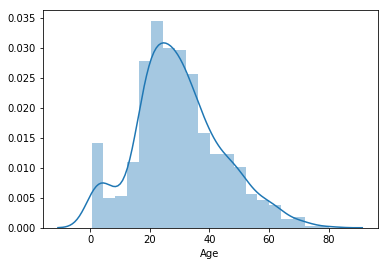

In [10]:
age_col = pd.notnull(data.Age)
age_plot = data.Age[age_col]
sns.distplot(age_plot)

From the graph we can see that mostly young people of around age 20-30 were aboard.\
Since the 'Age' column has many empty cells, we need to impute it by using the function Age_imputer as shown below. This function predicts the age of the passenger by using KNeighborsRegressor.

In [11]:
from sklearn.neighbors import KNeighborsRegressor

def Age_Imputer(data):
  
  '''This function is used to impute the Age column in the DataFrame using other features'''
  
  KNNR = KNeighborsRegressor(n_neighbors=3)
  
  data['isAgeNull'] = [False for i in range(len(data))]
  age = []
  pred = []

  for index, row in data.iterrows():
    if np.isnan(row['Age']):
      data.at[index,'isAgeNull'] = True
    else:
      pred.append([row['Pclass'],row['Embarked'],row['Member']])
      age.append([row['Age']])
      
  find_age = KNNR.fit(pred, age)

  for index, row in data.iterrows():
    if row['isAgeNull']:
      got_age = find_age.predict([[row['Pclass'],row['Embarked'],row['Member']]])
      data.at[index, 'Age'] = got_age
    
  data.drop(columns=['isAgeNull'], axis=1, inplace=True)

  
Age_Imputer(data)
print(data.head())
data.describe()

   PassengerId  Survived  Pclass  Sex   Age     Fare  Embarked  Member
0            1         0       3    0  22.0   7.2500         0       1
1            2         1       1    1  38.0  71.2833         1       1
2            3         1       3    1  26.0   7.9250         0       0
3            4         1       1    1  35.0  53.1000         0       1
4            5         0       3    0  35.0   8.0500         0       0


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Member
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.920692,32.204208,0.188552,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.449790,49.693429,0.391372,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,30.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200,1.000000,10.000000


Lets see the age distribution over the people who survived and those who died.

AxesSubplot(0.125,0.125;0.775x0.755)


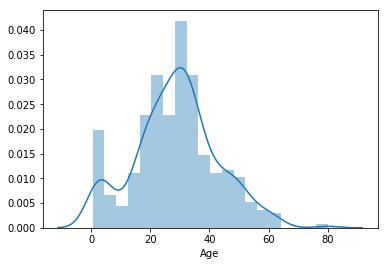

In [12]:
survived = []
died = []

for index, row in data.iterrows():
  if row['Survived'] == 1:
    survived.append(index)
  else:
    died.append(index)

age_survived = data.Age[survived]
age_died = data.Age[died]

print(sns.distplot(age_survived, bins=20))

AxesSubplot(0.125,0.125;0.775x0.755)


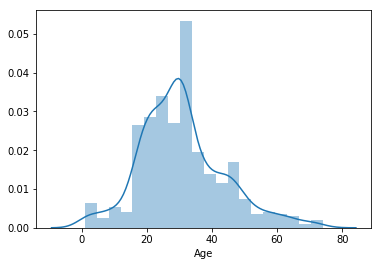

In [13]:
print(sns.distplot(age_died, bins=20))

So from the two plotted graphs above, we can classify passengers into 4 groups:

*    00-16 years => young 
*    16-36 years => adults
*    36-60 years => old
*    60-80 years => very_old\

Lets change the 'Age' column now.

In [14]:
for index, row in data.iterrows():
  n = row['Age']
  if n < 16:
    data.at[index, 'Age'] = 0
  elif n>=16 and n<=36:
    data.at[index, 'Age'] = 1
  elif n>36 and n<60:
    data.at[index, 'Age'] = 2
  else:
    data.at[index, 'Age'] = 3
    
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Member
0,1,0,3,0,1.0,7.2500,0,1
1,2,1,1,1,2.0,71.2833,1,1
2,3,1,3,1,1.0,7.9250,0,0
3,4,1,1,1,1.0,53.1000,0,1
4,5,0,3,0,1.0,8.0500,0,0


Now coming to 'Fare' column, lets see the plot.

AxesSubplot(0.125,0.125;0.775x0.755)


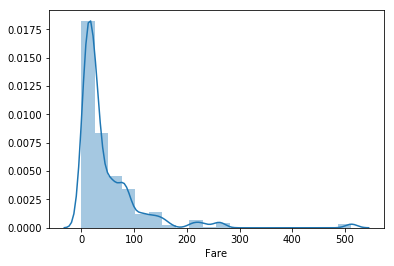

In [15]:
fare_survived = data.Fare[survived]
fare_died = data.Fare[died]

print(sns.distplot(fare_survived, bins=20))

AxesSubplot(0.125,0.125;0.775x0.755)


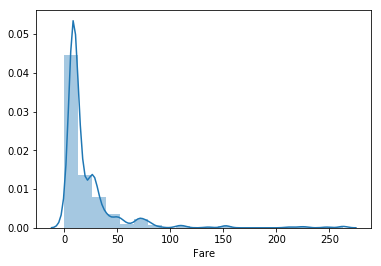

In [16]:
print(sns.distplot(fare_died, bins=20))

So, we can see that most of the people aboard were poor, and a vast number of them died. Still the number of survivors are mostly poor.\
Hence, lets catergorise the passengers into 3 classes:

*   0 - 50
*   50 - 100
*   100 - 600

In [17]:
for index, row in data.iterrows():
  n = row['Fare']
  if n <= 50:
    data.at[index, 'Fare'] = 0
  elif n>50 and n<=100:
    data.at[index, 'Fare'] = 1
  else:
    data.at[index, 'Fare'] = 2
    
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Member
0,1,0,3,0,1.0,0.0,0,1
1,2,1,1,1,2.0,1.0,1,1
2,3,1,3,1,1.0,0.0,0,0
3,4,1,1,1,1.0,1.0,0,1
4,5,0,3,0,1.0,0.0,0,0


Changing the data-type of 'Age' and 'Fare' column to int64, so as to make the dataset uniform.

In [18]:
data.Age = data.Age.astype('int64')
data.Fare = data.Fare.astype('int64')

print(data.dtypes)
data.head()

PassengerId    int64
Survived       int64
Pclass         int64
Sex            uint8
Age            int64
Fare           int64
Embarked       uint8
Member         int64
dtype: object


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Member
0,1,0,3,0,1,0,0,1
1,2,1,1,1,2,1,1,1
2,3,1,3,1,1,0,0,0
3,4,1,1,1,1,1,0,1
4,5,0,3,0,1,0,0,0


##**Data Visualisation**

---
Now, lets plot the graphs of remaining features in the dataset.


1) More people died than those who survived

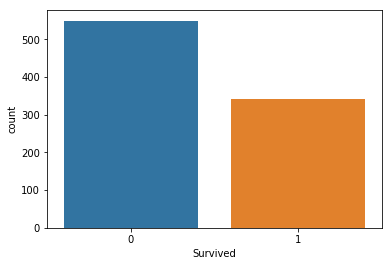

In [19]:
sns.countplot(x='Survived', data=data)

2) More female passengers survived

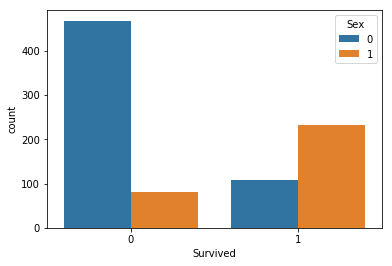

In [20]:
sns.countplot(x="Survived", hue="Sex", data=data)

3) Least survivors were from 3rd passenger class

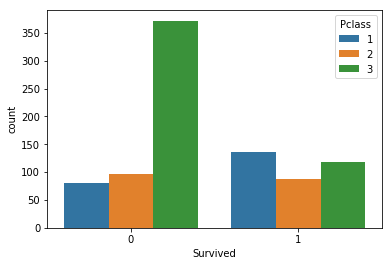

In [21]:
sns.countplot(x="Survived", hue="Pclass", data=data)

3) Least survivors were from port "S"

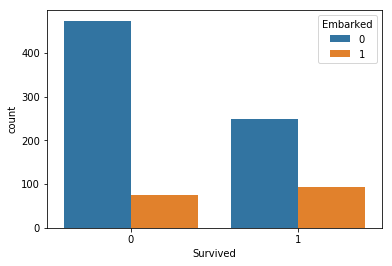

In [22]:
sns.countplot(x="Survived", hue="Embarked", data=data)

##**Training and predicting using various models**

---



Now, using various models to see which one gives the best prediction among all.

In [0]:
# importing all libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [0]:
# Logistic Regression
lr = LogisticRegression()

# Decision Tree
dt = DecisionTreeClassifier(random_state = 42, max_depth = 8)

# Naive Bayes
gnb = GaussianNB()

# Random Forest
rf = RandomForestClassifier(n_estimators = 140, random_state = 42, max_depth = 9, criterion = 'entropy')

models = {
            'Logistic Regression' : lr,
            'Decision Tree' : dt,
            'Gaussion NB' : gnb,
            'Random Forest' : rf
         }

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def accuracy(models, data):
  
  labels = np.array(data['Survived'])
  data = data.drop("Survived", axis=1)
  
  sizes = [str(round(i,2)) for i in np.linspace(0.5, 0.9, 5)]
  columns = ['name'] + sizes
  plot_models = pd.DataFrame(columns = columns)
  
  plot_models['name'] = models.keys()
  
  for test_size in sizes:
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = float(test_size), random_state = 42)
    acc = []
    
    for model in models.values():
      model.fit(train_data, train_labels)
      pred = model.predict(test_data)
      accuracy = accuracy_score(test_labels, pred)
      acc.append(accuracy)
      
    plot_models[test_size] = acc
      
  print(plot_models.describe(), end="\n\n")
  max_acc = plot_models.max()
  print(max_acc)

In [26]:
accuracy(models, data)

            0.5       0.6       0.7       0.8       0.9
count  4.000000  4.000000  4.000000  4.000000  4.000000
mean   0.799888  0.808879  0.802484  0.795582  0.782107
std    0.012864  0.017691  0.021476  0.019072  0.009995
min    0.784753  0.786916  0.775641  0.771388  0.774314
25%    0.794843  0.799533  0.792468  0.788219  0.777120
50%    0.799327  0.810280  0.803686  0.796634  0.778678
75%    0.804372  0.819626  0.813702  0.803997  0.783666
max    0.816143  0.828037  0.826923  0.817672  0.796758

name    Random Forest
0.5          0.816143
0.6          0.828037
0.7          0.826923
0.8          0.817672
0.9          0.796758
dtype: object


So, we can see that Random Forest performed best among all other classifiers used.

##**Testing On Test Dataset**

---



In [27]:
TEST = pd.read_csv("https://raw.githubusercontent.com/KaustavRaj/Kaggle-Titanic/master/test.csv")
TEST.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [28]:
TEST.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
def Prepare(data):
    data['Sex'] = pd.get_dummies(data['Sex'])
    data['Embarked'] = pd.get_dummies(data['Embarked'])
    data['Member'] = data['SibSp'] + data['Parch']
    data.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
    data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

    Age_Imputer(data)
    mean = data['Fare'].mean()

    for index, row in data.iterrows():
        n = row['Age']
        if n < 16:
            data.at[index, 'Age'] = 0
        elif n>=16 and n<=36:
            data.at[index, 'Age'] = 1
        elif n>36 and n<60:
            data.at[index, 'Age'] = 2
        else:
            data.at[index, 'Age'] = 3

        m = row['Fare']
        if m <= 50:
            data.at[index, 'Fare'] = 0
        elif m>50 and m<=100:
            data.at[index, 'Fare'] = 1
        else:
            data.at[index, 'Fare'] = 2

        if pd.isnull(row['Fare']):
            data.at[index, 'Fare'] = mean

    data.Age = data.Age.astype('int64')
    data.Fare = data.Fare.astype('int64')

In [30]:
Prepare(TEST)
TEST.head()
TEST2 = TEST.copy()
TEST2['Survived'] = rf.predict(TEST).astype(int)
TEST2 = TEST2.reset_index()
TEST2[['PassengerId','Survived']].to_csv("titanic_submit.csv",index=False)
print("file made")

file made
